In [79]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import data_utils
import deep_learning_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
# Could not get data for: ESNT, ATVI
data = data_utils.get_data(source="russell", size=500, start="2020-04-01", interval='1h')

Using 500 symbols
[*********************100%***********************]  500 of 500 completed


In [92]:
# Convert prices to percent change
raw_data = data["Adj Close"].pct_change().values[1:]

# Clean and transform data for modeling
sequences = data_utils.clean_data(raw_data)
train_sequences, test_sequences = data_utils.train_test_split(sequences, test_size=0.15)

# slice sequences for input-output relationtip with lagged price data as input
x_train, y_train = data_utils.slice_sequences(train_sequences, classification=True)
x_test, y_test = data_utils.slice_sequences(test_sequences, classification=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((924548, 10), (924548,), (163614, 10), (163614,))

In [96]:
# Basic neural net using custom deep learning utils
model = deep_learning_utils.build_nn(input_shape=x_train.shape[1:])
history = deep_learning_utils.train_nn(model, x_train, y_train, (x_test, y_test))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_232 (Dense)            (None, 64)                704       
_________________________________________________________________
dense_233 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_234 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_235 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_236 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_237 (Dense)            (None, 1)                 65        
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________

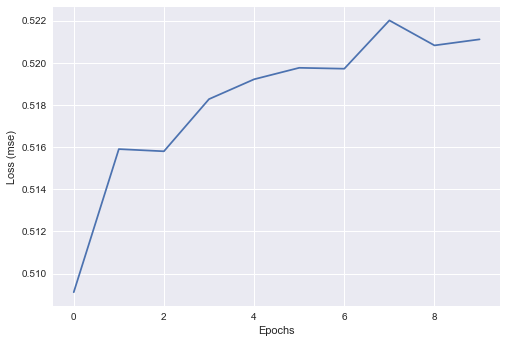

In [97]:
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Loss (mse)")
plt.show()